<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-libraries" data-toc-modified-id="Load-libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load libraries</a></span></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Train-model" data-toc-modified-id="Train-model-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Train model</a></span></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

# Load libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import evaluation
from sklearn.model_selection import train_test_split

# Load data

In [2]:
import _pickle as cPickle

data_dir = "./data/"
with open(data_dir + "data_mfcc.pkl", 'rb') as f:
    data_mfcc = cPickle.load(f)

In [3]:
data_mfcc.keys()

dict_keys(['sentence_I', 'sentence_II', 'same_speaker'])

In [4]:
len(data_mfcc['same_speaker'])

6932

In [5]:
data_mfcc['sentence_I'][0].shape

(530, 13)

In [6]:
TIME_LENGTH = 1000
N_MFCC = 13 # = data_mfcc['sentence_I'][0].shape[1]

X = []
y = []
for i in range(len(data_mfcc['sentence_I'])):
    sentence_I = np.zeros((TIME_LENGTH, N_MFCC), dtype=np.float32)
    sentence_I[-data_mfcc['sentence_I'][i].shape[0]:] = data_mfcc['sentence_I'][i][:TIME_LENGTH]
    sentence_II = np.zeros((TIME_LENGTH, N_MFCC), dtype=np.float32)
    sentence_II[-data_mfcc['sentence_II'][i].shape[0]:] = data_mfcc['sentence_II'][i][:TIME_LENGTH]
    X.append([sentence_I, sentence_II])
    y.append(data_mfcc['same_speaker'][i])
        
X = np.array(X)
y = np.array(y)
X.shape

(6932, 2, 1000, 13)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Train model

In [10]:
from modeling.gru_gru import GRU_GRU

model = GRU_GRU(num_features=N_MFCC)

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
gru (GRU)                       (None, None, 64)     15168       input_1[0][0]                    
__________________________________________________________________________________________________
gru_2 (GRU)                     (None, None, 64)     15168       input_2[0][0]                    
_______________________________________________________________________________________

In [18]:
model.fit(X_train, y_train, epochs=100, early_stopping_rounds=20)

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
input_6 (InputLayer)            [(None, None, 13)]   0                                            
__________________________________________________________________________________________________
gru_8 (GRU)                     (None, None, 64)     15168       input_5[0][0]                    
__________________________________________________________________________________________________
gru_10 (GRU)                    (None, None, 64)     15168       input_6[0][0]                    
_______________________________________________________________________________________

# Evaluation

In [16]:
y_pred = model.predict(X_test)

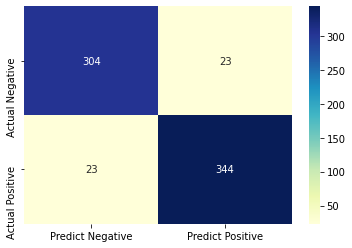

In [17]:
evaluation.plot_confusion_matrix(y_test, y_pred)

In [18]:
evaluation.print_classification_report(y_test, y_pred)

Classification report:
               precision    recall  f1-score   support

       False       0.93      0.93      0.93       327
        True       0.94      0.94      0.94       367

    accuracy                           0.93       694
   macro avg       0.93      0.93      0.93       694
weighted avg       0.93      0.93      0.93       694



In [19]:
evaluation.get_f1_score(y_test, y_pred, average='binary')

0.9373297002724795